✅ Dataset Loaded Successfully!
Shape: (506, 14)
Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
🎯 Target Column: MEDV
✅ Data split into train and test sets.

📊 Model Performance Comparison:
                       RMSE       MAE        R²
Linear Regression  4.928602  3.189092  0.668759
Ridge Regression   4.930977  3.185903  0.668440
Lasso Regression   5.067990  3.244377  0.649759
Random Forest      2.918952  2.046397  0.883815
XGBoost            2.533201  1.841584  0.912495


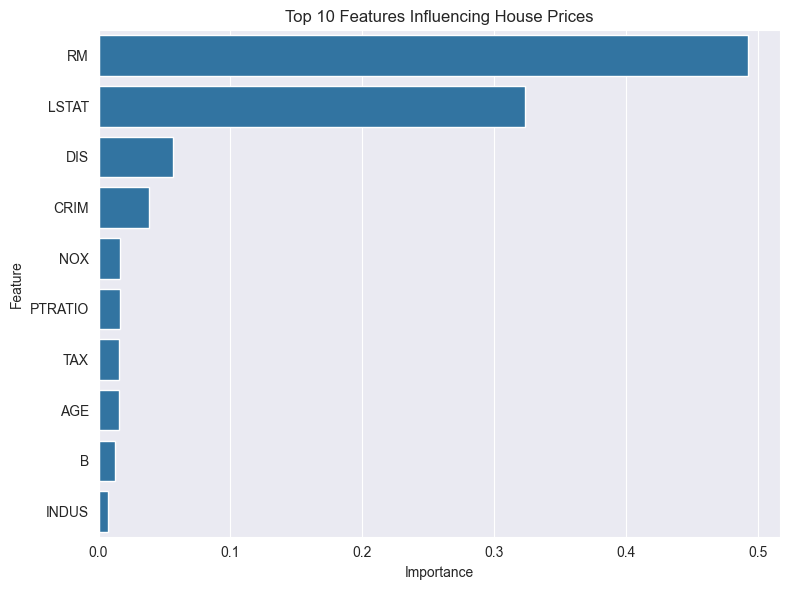


✅ All steps completed successfully!


In [1]:
# -------------------------------
# 🧠 Boston House Price Prediction (End-to-End)
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# -------------------------------
# 1. Load Dataset
# -------------------------------
df = pd.read_csv("house_prices.csv")

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))

# -------------------------------
# 2. Define Target Column
# -------------------------------
target_col = "MEDV"   # Boston Housing target column
print(f"🎯 Target Column: {target_col}")

# -------------------------------
# 3. Handle Missing Values
# -------------------------------
df = df.dropna(axis=0, how="any")

# -------------------------------
# 4. Split Features & Target
# -------------------------------
X = df.drop(columns=[target_col])
y = df[target_col]

# -------------------------------
# 5. Scale Features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 6. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("✅ Data split into train and test sets.")

# -------------------------------
# 7. Train Multiple Models
# -------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(
        n_estimators=300, learning_rate=0.05, random_state=42, verbosity=0
    ),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}

# -------------------------------
# 8. Compare Model Performance
# -------------------------------
results_df = pd.DataFrame(results).T
print("\n📊 Model Performance Comparison:")
print(results_df)

# -------------------------------
# 9. Feature Importance (Random Forest)
# -------------------------------
rf = models["Random Forest"]
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10))
plt.title("Top 10 Features Influencing House Prices")
plt.tight_layout()
plt.show()

print("\n✅ All steps completed successfully!")